In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
data.shape

(284807, 31)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [12]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [13]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Data Preprocessing

In [14]:
legit = data[data.Class == 0]
fraud = data[data.Class == 1]

In [15]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [16]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [17]:
legit['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [18]:
fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [19]:
legit_sample = legit.sample(n=492)

In [20]:
new_dataset = pd.concat([legit_sample, fraud], axis = 0)

In [21]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [22]:
y = new_dataset['Class']
x = new_dataset.drop(columns= 'Class', axis=1)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size= 0.2, stratify= y, random_state=2)

<IPython.core.display.Javascript object>

In [25]:
scaler= MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#### Model Training

In [27]:
models = []

models.append(('Logistic Regression', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('XGBClassifier', XGBClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))

In [30]:
for name, model in models:
    print(name)
    model.fit(x_train, y_train)
    train_pred= model.predict(x_train)
    test_pred= model.predict(x_test)
    
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(y_test, test_pred))
    print('train_accuracy:', accuracy_score(y_train, train_pred))
    print('test_accuracy:', accuracy_score(y_test, test_pred))
    print('\n')

Logistic Regression
[[98  1]
 [16 82]]
train_accuracy: 0.9339263024142312
test_accuracy: 0.9137055837563451


KNN
[[96  3]
 [14 84]]
train_accuracy: 0.940279542566709
test_accuracy: 0.9137055837563451


SVC
[[98  1]
 [15 83]]
train_accuracy: 0.9364675984752223
test_accuracy: 0.9187817258883249


XGBClassifier
[10:36:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\62812\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[[97  2]
 [11 87]]
train_accuracy: 1.0
test_accuracy: 0.934010152284264


Naive Bayes
[[95  4]
 [16 82]]
train_accuracy: 0.9034307496823379
test_accuracy: 0.8984771573604061


Random Forest
[[97  2]
 [12 86]]
train_accuracy: 1.0
test_accuracy: 0.9289340101522843


Decision Tree
[[90  9]
 [ 9 89]]
train_accuracy: 1.0
test_accuracy: 0.9086294416243654




In [31]:
import tensorflow
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.models import Sequential

In [33]:
x_train.shape[1]

30

In [46]:
model= Sequential()
model.add(Dense(30, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(30, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(30, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units= 1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

<AxesSubplot:>

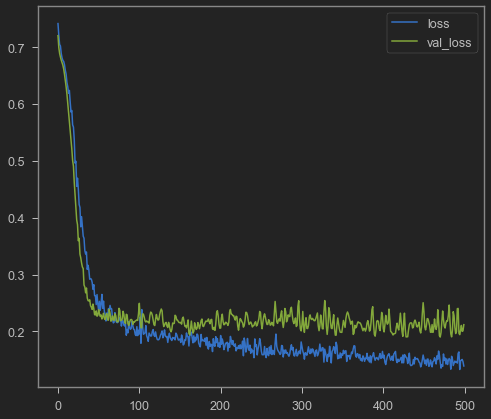

In [47]:
model.fit(x= x_train, y= y_train,
         epochs=500,
          verbose= 0,
         batch_size=256,
         validation_data= (x_test, y_test))
losses= pd.DataFrame(model.history.history)
losses.plot()

In [69]:
model= Sequential()
model.add(Dense(30, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(30, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(30, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units= 1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

<AxesSubplot:>

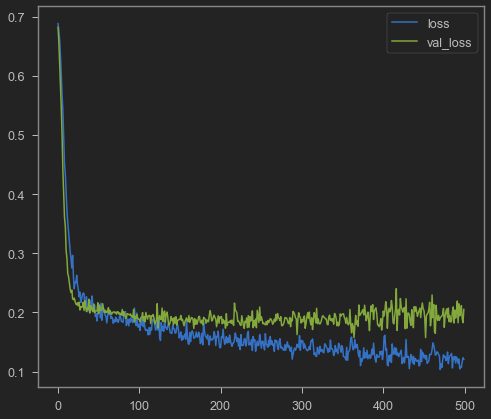

In [70]:
model.fit(x= x_train, y= y_train,
         epochs=500,
          verbose= 0,
         batch_size=64,
         validation_data= (x_test, y_test))
losses= pd.DataFrame(model.history.history)
losses.plot()

In [71]:
from sklearn.metrics import classification_report

In [72]:
predictions= model.predict(x_train).astype('int')

In [73]:
print(classification_report(y_train, predictions))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       393
           1       1.00      0.78      0.88       394

    accuracy                           0.89       787
   macro avg       0.91      0.89      0.89       787
weighted avg       0.91      0.89      0.89       787



In [74]:
prediction= model.predict(x_test).astype('int')

In [76]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        99
           1       1.00      0.80      0.89        98

    accuracy                           0.90       197
   macro avg       0.92      0.90      0.90       197
weighted avg       0.92      0.90      0.90       197

